In [235]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [236]:
# Данный блок в области 1 НЕ выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
#
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
#
# pip install

In [237]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pandas.plotting as pd_plt
import matplotlib.colors as plt_colors
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import RobustScaler, Normalizer
from sklearn.model_selection import train_test_split, cross_val_score  
from sklearn.model_selection import GridSearchCV, KFold, StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import make_pipeline
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score
from sklearn.metrics import PrecisionRecallDisplay, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from IPython.display import display_html
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, TunedThresholdClassifierCV, FixedThresholdClassifier
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score


### Область работы 2 (поиск  модели .... )

In [238]:
# Данный блок(и) НЕ выполняются преподавателем в области 2
# блок(и) предназначены для поиска лучшей модели 
# должен быть понятен и очевиден отбор параметров модели
# 
# Запрещается размещать данные блоки за пределами обасти 2
# Все блоки данной области должны быть выполнены
#
# ЗАПРЕЩАЕТСЯ ИСПОЛЬЗОВАТЬ ТЕСТОВЫЙ НАБОР
#
# Путь к тренировочному набору
# 
path_train ='train.csv' # содержит только имя файла, без имен папок !!!

**Проверяем данные, ищем свинью**

In [239]:
df = pd.read_csv(path_train)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295 entries, 0 to 1294
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1294 non-null   float64
 1   volatile acidity      1294 non-null   float64
 2   citric acid           1295 non-null   float64
 3   residual sugar        1295 non-null   float64
 4   chlorides             1295 non-null   float64
 5   free sulfur dioxide   1295 non-null   float64
 6   total sulfur dioxide  1295 non-null   float64
 7   density               1295 non-null   float64
 8   pH                    1294 non-null   float64
 9   sulphates             1293 non-null   float64
 10  alcohol               1295 non-null   float64
 11  quality               1295 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 121.5 KB


In [240]:
null = df[df.isnull().any(axis = 1)]
df = df.dropna()
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1291.000000,1291.000000,1291.000000,1291.000000,1291.000000,1291.000000,1291.000000,1291.000000,1291.000000,1291.000000,1291.000000,1291.000000
mean,8.443377,0.500701,0.299326,2.572541,0.085473,15.333075,44.625484,0.996579,3.303354,0.678350,10.674167,5.939582
std,1.818346,0.182297,0.200514,1.368263,0.045106,10.470104,35.434022,0.001970,0.157207,0.170034,1.174266,0.955315
min,4.700000,0.120000,0.000000,0.900000,0.012000,1.000000,7.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.200000,0.360000,0.120000,1.900000,0.068000,7.000000,20.000000,0.995325,3.200000,0.570000,9.600000,5.000000
50%,8.100000,0.480000,0.310000,2.200000,0.078000,13.000000,34.000000,0.996600,3.300000,0.640000,10.500000,6.000000
75%,9.400000,0.620000,0.460000,2.600000,0.090000,21.000000,57.000000,0.997795,3.390000,0.760000,11.500000,7.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003200,4.010000,2.000000,14.900000,8.000000


In [241]:
df.duplicated().sum()

276

In [242]:
df = df.drop_duplicates()
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000
mean,8.326305,0.529601,0.275714,2.527734,0.088309,15.713300,47.059606,0.996748,3.308227,0.661527,10.419754,5.625616
std,1.730749,0.183901,0.195442,1.352214,0.049185,10.422607,34.510877,0.001850,0.155514,0.176689,1.087667,0.822354
min,4.700000,0.120000,0.000000,0.900000,0.012000,1.000000,7.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.100000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.080000,13.000000,38.000000,0.996760,3.310000,0.620000,10.200000,6.000000
75%,9.250000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997800,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003200,4.010000,2.000000,14.900000,8.000000


In [243]:
print("Ключи load_dataset:\n", df.keys())

Ключи load_dataset:
 Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [244]:
df['quality'] = df['quality'].apply(lambda x: 1 if x> 6 else 0)
y = df['quality']
X = df.drop(['quality'], axis = 1)
y

0       0
1       0
2       0
3       1
4       1
       ..
1285    0
1286    0
1288    0
1289    0
1293    0
Name: quality, Length: 1015, dtype: int64

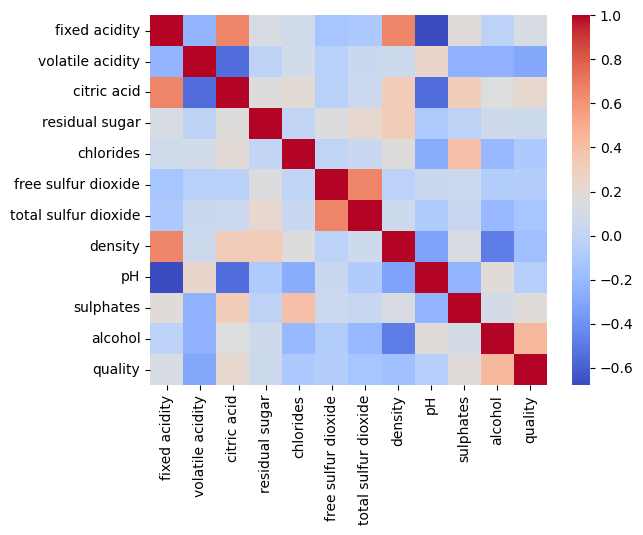

In [245]:
sns.heatmap(df.corr(), cmap = 'coolwarm')
plt.show()

**МЕТОД ОПОРНЫХ ВЕКТОРОВ**

In [246]:
X_train,X_test,y_train,y_test=train_test_split(X,y, stratify=y, test_size=0.3)
df.shape

(1015, 12)

In [247]:
cv = StratifiedKFold(n_splits=7, shuffle=True)

In [248]:
digit_0 = make_pipeline(MinMaxScaler(), SVC(kernel='sigmoid'))
#C_0=np.array([480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490,491, 492,493,494,495,496, 497,498, 499, 500, 501, 502, 503, 504, 505, 506,507,508, 510])
#gamma_0=[0.07, 0.08, 0.09,0.081, 0.09,0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099, 0.100, 0.101, 0.102, 0.103, 0.104, 0.105, 0.11, 0.115]
C_0 = np.array([546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 560, 565])
gamma_0 = np.array([ 0.09,0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099, 0.100, 0.101, 0.102])
param_grid_0 =[
    {'minmaxscaler': [MinMaxScaler()], 
     'svc': [svm.SVC(kernel='sigmoid')],
     'svc__C': C_0,
     'svc__gamma': gamma_0
     }
]
grid_0 = GridSearchCV(digit_0, param_grid_0, scoring = 'roc_auc', cv=cv, return_train_score=True)
grid_0.fit(X_train,y_train)
table_0 = pd.DataFrame(grid_0.cv_results_)

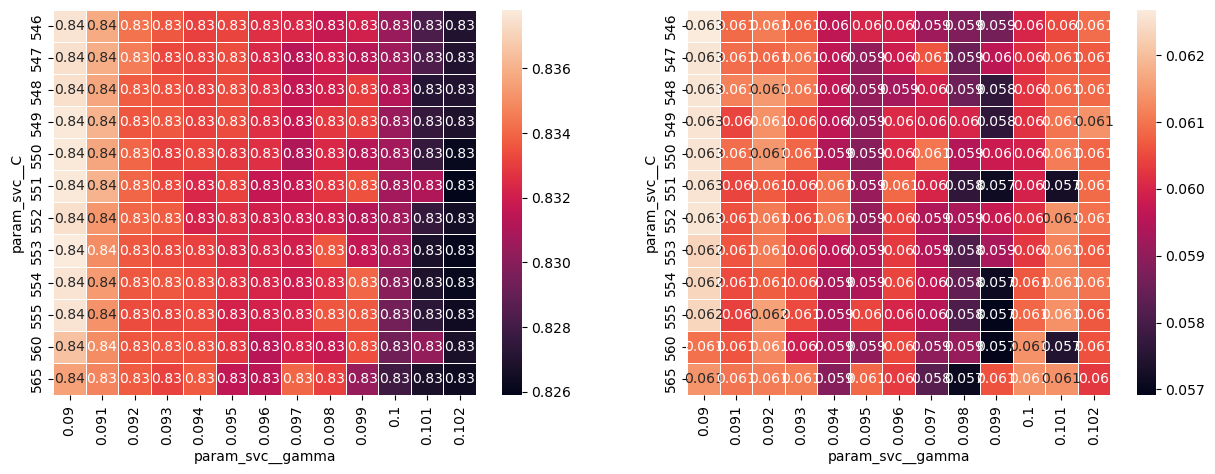

In [249]:
pv_table_0 = table_0.pivot_table(index= 'param_svc__C', columns = 'param_svc__gamma', values = 'mean_test_score')
pv_table_std_0 = table_0.pivot_table(index= 'param_svc__C', columns = 'param_svc__gamma', values = 'std_test_score')
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,5))
sns.heatmap(pv_table_0, annot = True, linewidths = .5, ax = ax1);
sns.heatmap(pv_table_std_0, annot = True, linewidths = .5, ax = ax2);

In [250]:
pd.DataFrame(grid_0.cv_results_).sort_values(["rank_test_score",'std_test_score']).T

,91,39,52,65,104,117,0,13,26,78,...,142,102,154,90,129,155,116,64,103,77
mean_fit_time,0.016094,0.02308,0.018663,0.016242,0.029777,0.017092,0.041888,0.01838,0.017666,0.016384,...,0.014537,0.025645,0.01097,0.015527,0.016954,0.010818,0.014247,0.01795,0.020516,0.016949
std_fit_time,0.001248,0.003633,0.002858,0.002596,0.010051,0.001888,0.041691,0.002055,0.00218,0.002961,...,0.001918,0.005809,0.001508,0.002189,0.001192,0.000813,0.001381,0.004332,0.00365,0.003986
mean_score_time,0.00485,0.007981,0.007126,0.005842,0.008692,0.005414,0.007694,0.006698,0.005843,0.006128,...,0.005121,0.008264,0.00399,0.005131,0.005985,0.003847,0.005136,0.005273,0.006128,0.005986
std_score_time,0.000645,0.001686,0.001453,0.001351,0.001661,0.000727,0.002305,0.00148,0.001547,0.001802,...,0.000984,0.0019,0.0,0.000348,0.001193,0.000349,0.000637,0.001274,0.001453,0.001598
param_minmaxscaler,MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),...,MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler()
param_svc,SVC(kernel='sigmoid'),SVC(kernel='sigmoid'),SVC(kernel='sigmoid'),SVC(kernel='sigmoid'),SVC(kernel='sigmoid'),SVC(kernel='sigmoid'),SVC(kernel='sigmoid'),SVC(kernel='sigmoid'),SVC(kernel='sigmoid'),SVC(kernel='sigmoid'),...,SVC(kernel='sigmoid'),SVC(kernel='sigmoid'),SVC(kernel='sigmoid'),SVC(kernel='sigmoid'),SVC(kernel='sigmoid'),SVC(kernel='sigmoid'),SVC(kernel='sigmoid'),SVC(kernel='sigmoid'),SVC(kernel='sigmoid'),SVC(kernel='sigmoid')
param_svc__C,553,549,550,551,554,555,546,547,548,552,...,560,553,565,552,555,565,554,550,553,551
param_svc__gamma,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,...,0.102,0.101,0.101,0.102,0.102,0.102,0.102,0.102,0.102,0.102
params,"{'minmaxscaler': MinMaxScaler(), 'svc': SVC(ke...","{'minmaxscaler': MinMaxScaler(), 'svc': SVC(ke...","{'minmaxscaler': MinMaxScaler(), 'svc': SVC(ke...","{'minmaxscaler': MinMaxScaler(), 'svc': SVC(ke...","{'minmaxscaler': MinMaxScaler(), 'svc': SVC(ke...","{'minmaxscaler': MinMaxScaler(), 'svc': SVC(ke...","{'minmaxscaler': MinMaxScaler(), 'svc': SVC(ke...","{'minmaxscaler': MinMaxScaler(), 'svc': SVC(ke...","{'minmaxscaler': MinMaxScaler(), 'svc': SVC(ke...","{'minmaxscaler': MinMaxScaler(), 'svc': SVC(ke...",...,"{'minmaxscaler': MinMaxScaler(), 'svc': SVC(ke...","{'minmaxscaler': MinMaxScaler(), 'svc': SVC(ke...","{'minmaxscaler': MinMaxScaler(), 'svc': SVC(ke...","{'minmaxscaler': MinMaxScaler(), 'svc': SVC(ke...","{'minmaxscaler': MinMaxScaler(), 'svc': SVC(ke...","{'minmaxscaler': MinMaxScaler(), 'svc': SVC(ke...","{'minmaxscaler': MinMaxScaler(), 'svc': SVC(ke...","{'minmaxscaler': MinMaxScaler(), 'svc': SVC(ke...","{'minmaxscaler': MinMaxScaler(), 'svc': SVC(ke...","{'minmaxscaler': MinMaxScaler(), 'svc': SVC(ke..."
split0_test_score,0.896104,0.896104,0.896104,0.896104,0.896104,0.896104,0.896916,0.896104,0.896104,0.896104,...,0.895292,0.894481,0.894481,0.894481,0.894481,0.894481,0.894481,0.894481,0.894481,0.894481


In [251]:
model_0 = make_pipeline(MinMaxScaler(), SVC(kernel= 'sigmoid', C=547, gamma = 0.099, probability=True))
model_0.fit(X_train, y_train)
print(model_0.score(X_train, y_train))
print(model_0.score(X_test, y_test))
y_predict_0 = model_0.predict(X_test)
matrix_0=confusion_matrix(y_test,y_predict_0)
roc_auc_score(y_test, y_predict_0)

0.8577464788732394
0.8622950819672132


0.6011178861788619

In [252]:
model_1 = make_pipeline(MinMaxScaler(), SVC(kernel= 'sigmoid', C=556, gamma = 0.099))
model_1.fit(X_train, y_train)
print(model_1.score(X_train, y_train))
print(model_1.score(X_test, y_test))
y_predict_1 = model_1.predict(X_test)
matrix_1=confusion_matrix(y_test,y_predict_1)
roc_auc_score(y_test, y_predict_1)

0.8549295774647887
0.8655737704918033


0.6133130081300814

In [253]:
print(classification_report(y_test, y_predict_0))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       264
           1       0.48      0.24      0.32        41

    accuracy                           0.86       305
   macro avg       0.68      0.60      0.62       305
weighted avg       0.84      0.86      0.84       305



In [254]:
print(classification_report(y_test, y_predict_1))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93       264
           1       0.50      0.27      0.35        41

    accuracy                           0.87       305
   macro avg       0.70      0.61      0.64       305
weighted avg       0.84      0.87      0.85       305



In [255]:
digit_2 = make_pipeline( MinMaxScaler(), SVC(kernel='poly', degree = 5) ) #probability = True
C_2=np.array([187, 188, 189, 190,190.5, 191, 191.5, 192, 192.5,193, 193.5, 194.5, 195,194, 197])
gamma_2 = np.array([0.71, 0.73,0.731, 0.732, 0.733, 0.734, 0.735, 0.736, 0.737, 0.738, 0.739, 0.74, 0.75, 0.76, 0.77, 0.78,0.781, 0.782, 0.783, 0.784, 0.785,0.786, 0.9])
#0.09,0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099, 0.100

param_grid_2 =[
    {'minmaxscaler': [StandardScaler(), MinMaxScaler()], 
     'svc': [svm.SVC()],
     'svc__C': C_2,
     'svc__gamma': gamma_2
     }
]

grid_2 = GridSearchCV(digit_2, param_grid_2, cv=cv, return_train_score=True, n_jobs=-1)
grid_2.fit(X_train,y_train)
table_2=pd.DataFrame(grid_2.cv_results_)

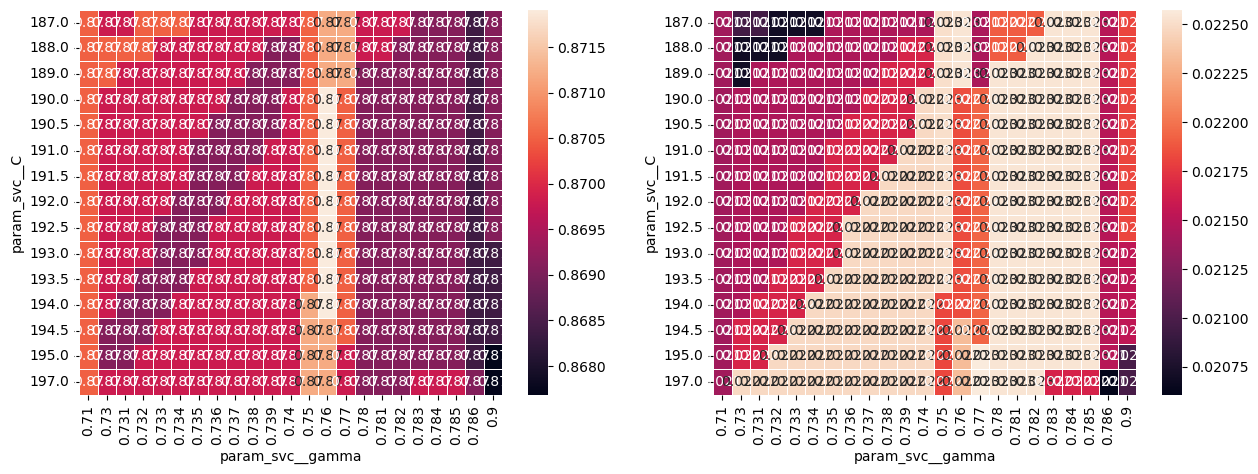

In [256]:
pv_table_2=table_2.pivot_table(index='param_svc__C',columns='param_svc__gamma',values='mean_test_score')
pv_table_std_2=table_2.pivot_table(index='param_svc__C',columns='param_svc__gamma',values='std_test_score')
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.heatmap(pv_table_2, annot=True, linewidths=.5, ax=ax1)
sns.heatmap(pv_table_std_2, annot=True, linewidths=.5, ax=ax2);

In [257]:
print(pv_table_2.stack())
pd.DataFrame(grid_2.cv_results_).sort_values(["rank_test_score",'std_test_score']).T


param_svc__C  param_svc__gamma
187.0         0.710               0.870504
              0.730               0.869796
              0.731               0.869796
              0.732               0.870504
              0.733               0.870504
                                    ...   
197.0         0.783               0.869789
              0.784               0.869789
              0.785               0.869789
              0.786               0.869082
              0.900               0.867682
Length: 345, dtype: float64


,13,36,59,82,105,128,151,174,197,220,...,660,661,662,663,664,665,681,682,683,684
mean_fit_time,0.04468,0.056971,0.044767,0.044964,0.055483,0.093503,0.046402,0.057026,0.067638,0.076107,...,0.044561,0.044821,0.044966,0.044946,0.044391,0.044907,0.085831,0.077973,0.065711,0.086754
std_fit_time,0.00367,0.012842,0.001487,0.002111,0.011308,0.015446,0.003892,0.012327,0.012533,0.011274,...,0.005218,0.004573,0.003417,0.004308,0.005234,0.006381,0.013044,0.01485,0.00658,0.021913
mean_score_time,0.016745,0.026245,0.017682,0.016388,0.017472,0.024797,0.017611,0.01697,0.018539,0.024376,...,0.008703,0.008699,0.00891,0.008703,0.008771,0.00891,0.014903,0.016982,0.015111,0.018244
std_score_time,0.002648,0.010109,0.002417,0.000725,0.001964,0.006066,0.00238,0.001405,0.002676,0.008039,...,0.0008,0.000456,0.000496,0.001019,0.000243,0.000171,0.003464,0.007513,0.008492,0.007376
param_minmaxscaler,StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),...,MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler()
param_svc,SVC(),SVC(),SVC(),SVC(),SVC(),SVC(),SVC(),SVC(),SVC(),SVC(),...,SVC(),SVC(),SVC(),SVC(),SVC(),SVC(),SVC(),SVC(),SVC(),SVC()
param_svc__C,187.0,188.0,189.0,190.0,190.5,191.0,191.5,192.0,192.5,193.0,...,194.0,194.0,194.0,194.0,194.0,194.0,197.0,197.0,197.0,197.0
param_svc__gamma,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,...,0.781,0.782,0.783,0.784,0.785,0.786,0.77,0.78,0.781,0.782
params,"{'minmaxscaler': StandardScaler(), 'svc': SVC(...","{'minmaxscaler': StandardScaler(), 'svc': SVC(...","{'minmaxscaler': StandardScaler(), 'svc': SVC(...","{'minmaxscaler': StandardScaler(), 'svc': SVC(...","{'minmaxscaler': StandardScaler(), 'svc': SVC(...","{'minmaxscaler': StandardScaler(), 'svc': SVC(...","{'minmaxscaler': StandardScaler(), 'svc': SVC(...","{'minmaxscaler': StandardScaler(), 'svc': SVC(...","{'minmaxscaler': StandardScaler(), 'svc': SVC(...","{'minmaxscaler': StandardScaler(), 'svc': SVC(...",...,"{'minmaxscaler': MinMaxScaler(), 'svc': SVC(),...","{'minmaxscaler': MinMaxScaler(), 'svc': SVC(),...","{'minmaxscaler': MinMaxScaler(), 'svc': SVC(),...","{'minmaxscaler': MinMaxScaler(), 'svc': SVC(),...","{'minmaxscaler': MinMaxScaler(), 'svc': SVC(),...","{'minmaxscaler': MinMaxScaler(), 'svc': SVC(),...","{'minmaxscaler': MinMaxScaler(), 'svc': SVC(),...","{'minmaxscaler': MinMaxScaler(), 'svc': SVC(),...","{'minmaxscaler': MinMaxScaler(), 'svc': SVC(),...","{'minmaxscaler': MinMaxScaler(), 'svc': SVC(),..."
split0_test_score,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,0.882353,...,0.862745,0.862745,0.862745,0.862745,0.862745,0.862745,0.862745,0.862745,0.862745,0.862745


In [268]:
model_2 = make_pipeline(MinMaxScaler(), SVC(kernel= 'poly', C=190, gamma = 0.784))
model_2.fit(X_train, y_train)
print(model_2.score(X_test, y_test),model_2.score(X_train, y_train) )
roc_auc_score(y_test, y_predict_2)

0.8885245901639345 0.9098591549295775


0.6780764966740576

In [269]:
y_predict_2 = model_2.predict(X_test)
matrix_2=confusion_matrix(y_test,y_predict_2)
print(classification_report(y_test, y_predict_2))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       264
           1       0.64      0.39      0.48        41

    accuracy                           0.89       305
   macro avg       0.78      0.68      0.71       305
weighted avg       0.87      0.89      0.88       305



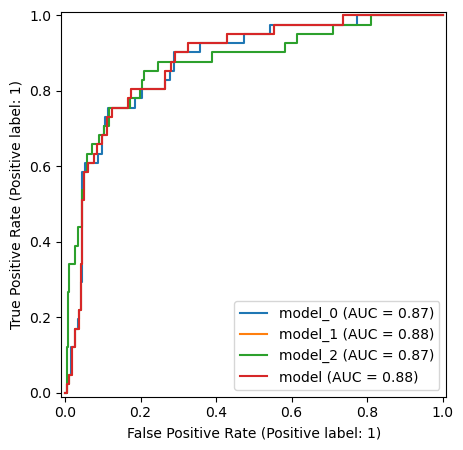

In [270]:
fig, ax_roc = plt.subplots(1,1, figsize=(10, 5))
RocCurveDisplay.from_estimator(model_0, X_test, y_test, ax = ax_roc, name = 'model_0');
RocCurveDisplay.from_estimator(model_1, X_test, y_test, ax = ax_roc, name = 'model_1');
RocCurveDisplay.from_estimator(model_2, X_test, y_test, ax = ax_roc, name = 'model_2');
RocCurveDisplay.from_predictions(y_test, model_1.decision_function(X_test), ax = ax_roc, name = 'model');

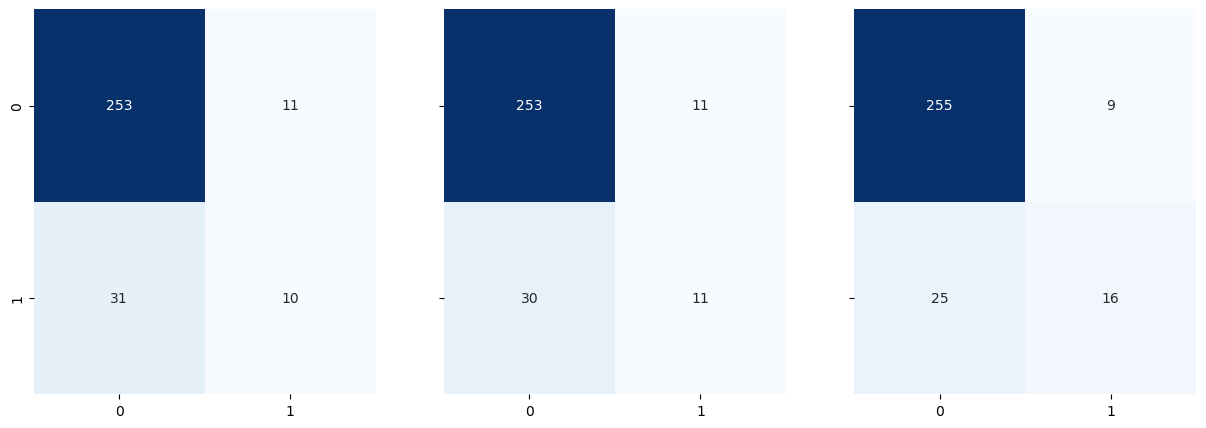

In [261]:
fig,ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15,5))
ax = plt.subplot(1, 3, 1)
sns.heatmap(matrix_0,annot=True, fmt='g', cbar=None,cmap="Blues");
ax = plt.subplot(1, 3, 2)
sns.heatmap(matrix_1,annot=True, fmt='g', cbar=None,cmap="Blues");
ax = plt.subplot(1, 3, 3)
sns.heatmap(matrix_2,annot=True, fmt='g', cbar=None,cmap="Blues");

In [262]:
model_1.decision_function(X_test)[:10]
decision_values = model_1.decision_function(X_test)
auc_score = roc_auc_score(y_test, decision_values)
model_1.predict(X_test)

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [263]:
ths = pd.DataFrame({'predict':model_2.decision_function(X_test),
                    'true':y_test})
ths.sort_values(by='predict', ascending=False)
probabilities = model_1.decision_function(X_test)

In [264]:
ths.value_counts(['predict']).sort_index(ascending=False)

predict   
 2.051900     1
 1.633096     1
 1.615605     1
 1.441240     1
 1.410529     1
             ..
-10.802609    1
-12.403203    1
-13.005923    1
-17.566354    1
-18.344889    1
Name: count, Length: 305, dtype: int64

In [265]:
cv_scores = [
    "train_accuracy",
    "test_accuracy",
    "train_balanced_accuracy",
    "test_balanced_accuracy",
]
cv_results_model_origin = pd.DataFrame(
    cross_validate(
        model_2,
        X_train,
        y_train,
        scoring=["accuracy", "balanced_accuracy"],
        cv=cv,
        return_train_score=True,
        return_estimator=True,
    )
)
cv_results_model_origin[cv_scores].agg(["mean", "std"]).T


,mean,std
train_accuracy,0.916904,0.006028
test_accuracy,0.870511,0.027568
train_balanced_accuracy,0.737853,0.029106
test_balanced_accuracy,0.643639,0.052159


In [266]:
cv_results_model_tuned = pd.DataFrame(
    cross_validate(
        model_2,
        X_train,
        y_train,
        scoring=["accuracy", "balanced_accuracy"],
        cv=cv,
        return_train_score=True,
        return_estimator=True,
    )
)
cv_results_model_tuned[cv_scores].agg(["mean", "std"]).T

,mean,std
train_accuracy,0.917373,0.005215
test_accuracy,0.850736,0.020632
train_balanced_accuracy,0.739534,0.019981
test_balanced_accuracy,0.592438,0.031864


In [267]:
decision_threshold = pd.Series(
    [est.best_threshold_ for est in cv_results_model_tuned["estimator"]],
)

fig, ax = plt.subplots(figsize=(15,5))

ax = decision_threshold.plot.kde(bw_method=None) # w_method=0.3 'scott', 'silverman',
line = ax.get_lines() # забрал список отрисованных линий
x_plt, y_plt = line[0].get_data() # из списка взял нужную линию для разборки по точкам 

ths = {
    'mode':   [x_plt[np.argmax(y_plt)],'lightcoral'],
    'median': [decision_threshold.median(), 'lightgreen'],
    'mean':   [decision_threshold.mean(),  'gray']
}

for key in ths.keys():
    ax.axvline(
        ths[key][0],
        color=ths[key][1],
        linestyle="--",
        label=f"{key} decision threshold: {ths[key][0]:.5f}",
    )

ax.set_xlabel("значение порога")
ax.legend(loc="upper right")
_ = ax.set_title(
    "Плотность распределения порога принятия решения на кроссвалидационных выборках"
)

AttributeError: 'Pipeline' object has no attribute 'best_threshold_'